In [1]:
import numpy as np

In [2]:
import pandas as pd

In [27]:
import matplotlib.pyplot as plt


In [5]:
from keras.models import Sequential

In [37]:
from keras.layers import Input,Convolution2D,Flatten,Dense,Dropout


In [14]:
import tensorflow as tf

In [38]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [15]:
x=tf.keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [17]:
x

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [18]:
x_=np.array(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [19]:
x=x_[:,1 :]

In [20]:
x=x/255.0

In [21]:
y=x_[:,0]

In [22]:
print(x.shape,y.shape)

(2, 1) (2,)


In [40]:
#x_train=y.reshape((-1,28,28,1))

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
y_train.shape

(60000,)

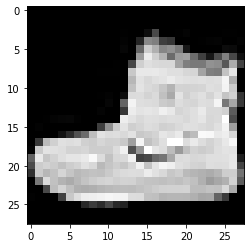

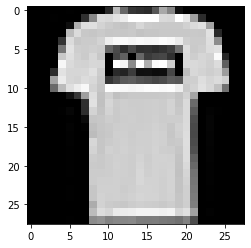

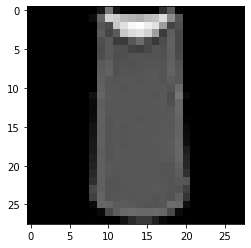

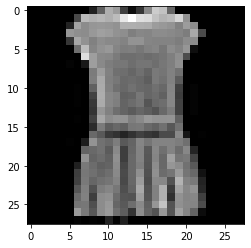

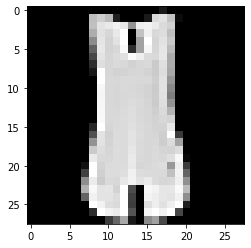

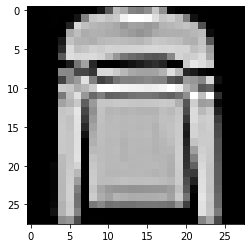

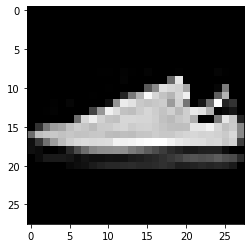

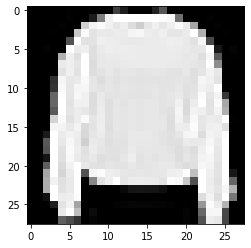

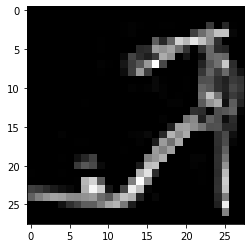

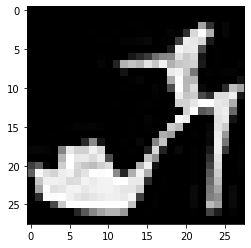

In [28]:
for i in  range(10):
  plt.figure(i)
  plt.imshow(x_train[i].reshape(28,28),cmap="gray")
  plt.show()

In [29]:
model=Sequential()

In [32]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(28,28,1)))

In [33]:
model.add(Convolution2D(64,(3,3),activation="relu"))

In [34]:
model.add(Dropout(0.25))

In [41]:
model.add(MaxPooling2D(2,2))

In [42]:
model.add(Convolution2D(32,(5,5),activation="relu"))
model.add(Convolution2D(8,(5,5),activation="relu"))

In [43]:
model.add(Flatten())

In [44]:
model.add(Dense(10,activation='softmax'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 8)           6408      
                                                        

In [51]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [57]:
hist=model.fit(x_train, y_train,epochs=3,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/3
188/188 [==============================] - 153s 816ms/step - loss: 0.4934 - accuracy: 0.8307 - val_loss: 0.4654 - val_accuracy: 0.8417
Epoch 2/3
188/188 [==============================] - 151s 801ms/step - loss: 0.4423 - accuracy: 0.8473 - val_loss: 0.4411 - val_accuracy: 0.8448
Epoch 3/3
188/188 [==============================] - 154s 821ms/step - loss: 0.3997 - accuracy: 0.8595 - val_loss: 0.3985 - val_accuracy: 0.8614


In [53]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

[]

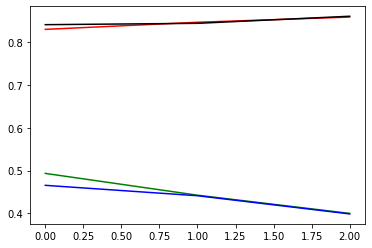

In [61]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.plot()
